In [17]:
import json
def collect_questions(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    questions = []
    for article in data['data']:
        for paragraph in article['paragraphs']:
            for qas in paragraph['qas']:
                questions.append(qas['question'])
    
    return questions

file_path = './data/train-v2.0.json'
questions_list = collect_questions(file_path)

In [18]:
len(questions_list)

130319

In [19]:
print(questions_list[0:10])

['When did Beyonce start becoming popular?', 'What areas did Beyonce compete in when she was growing up?', "When did Beyonce leave Destiny's Child and become a solo singer?", 'In what city and state did Beyonce  grow up? ', 'In which decade did Beyonce become famous?', 'In what R&B group was she the lead singer?', 'What album made her a worldwide known artist?', "Who managed the Destiny's Child group?", 'When did Beyoncé rise to fame?', "What role did Beyoncé have in Destiny's Child?"]


In [20]:
from sentence_transformers import SentenceTransformer

sampled_questions = questions_list[:10_000]
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sampled_questions)


/Users/alprielse/src/sandboxed/2024-03-02_pca-practice/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
from sklearn.manifold import TSNE
tsne_results = TSNE(n_components=2).fit_transform(embeddings)

print(tsne_results.shape)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/alprielse/src/sandboxed/2024-03-02_pca-practice/.venv/lib/python3.11/site-packages/threadpoolctl.py:1186: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


(10000, 2)


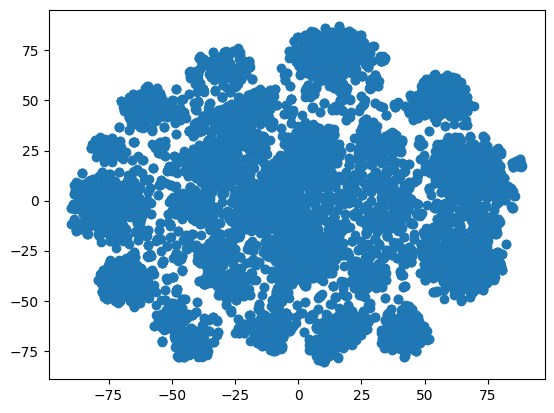

In [22]:
import matplotlib.pyplot as plt

plt.scatter(tsne_results[:,0], tsne_results[:,1])
plt.show()

In [23]:
embeddings.shape

(10000, 384)

In [36]:
import numpy as np
from sklearn.decomposition import PCA

num_components = np.arange(0, 300, 10)
explained_variance = []

for n in num_components:
  pca = PCA(n_components=n)
  pca.fit(embeddings)
  explained_variance.append(np.sum(pca.explained_variance_ratio_))

print(len(explained_variance))

30


In [37]:
print(explained_variance)

[0.0, 0.25812373, 0.3864536, 0.47486508, 0.5386407, 0.5913537, 0.6353277, 0.6729155, 0.70603085, 0.7364064, 0.76299244, 0.7873798, 0.8093369, 0.82880217, 0.84707963, 0.86370903, 0.87877196, 0.89271915, 0.90577453, 0.91754556, 0.9283469, 0.93816453, 0.9470128, 0.95516795, 0.9625428, 0.9690581, 0.97468084, 0.9795165, 0.98363817, 0.98705554]


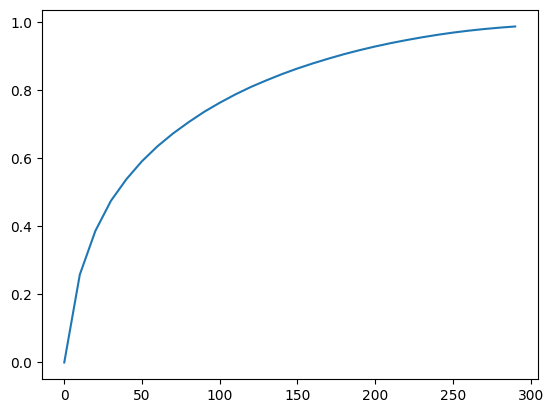

In [38]:
plt.plot(num_components, explained_variance)

In [41]:
embeddings.shape

(10000, 384)

(10000, 25)
(10000, 50)
(10000, 100)
(10000, 200)


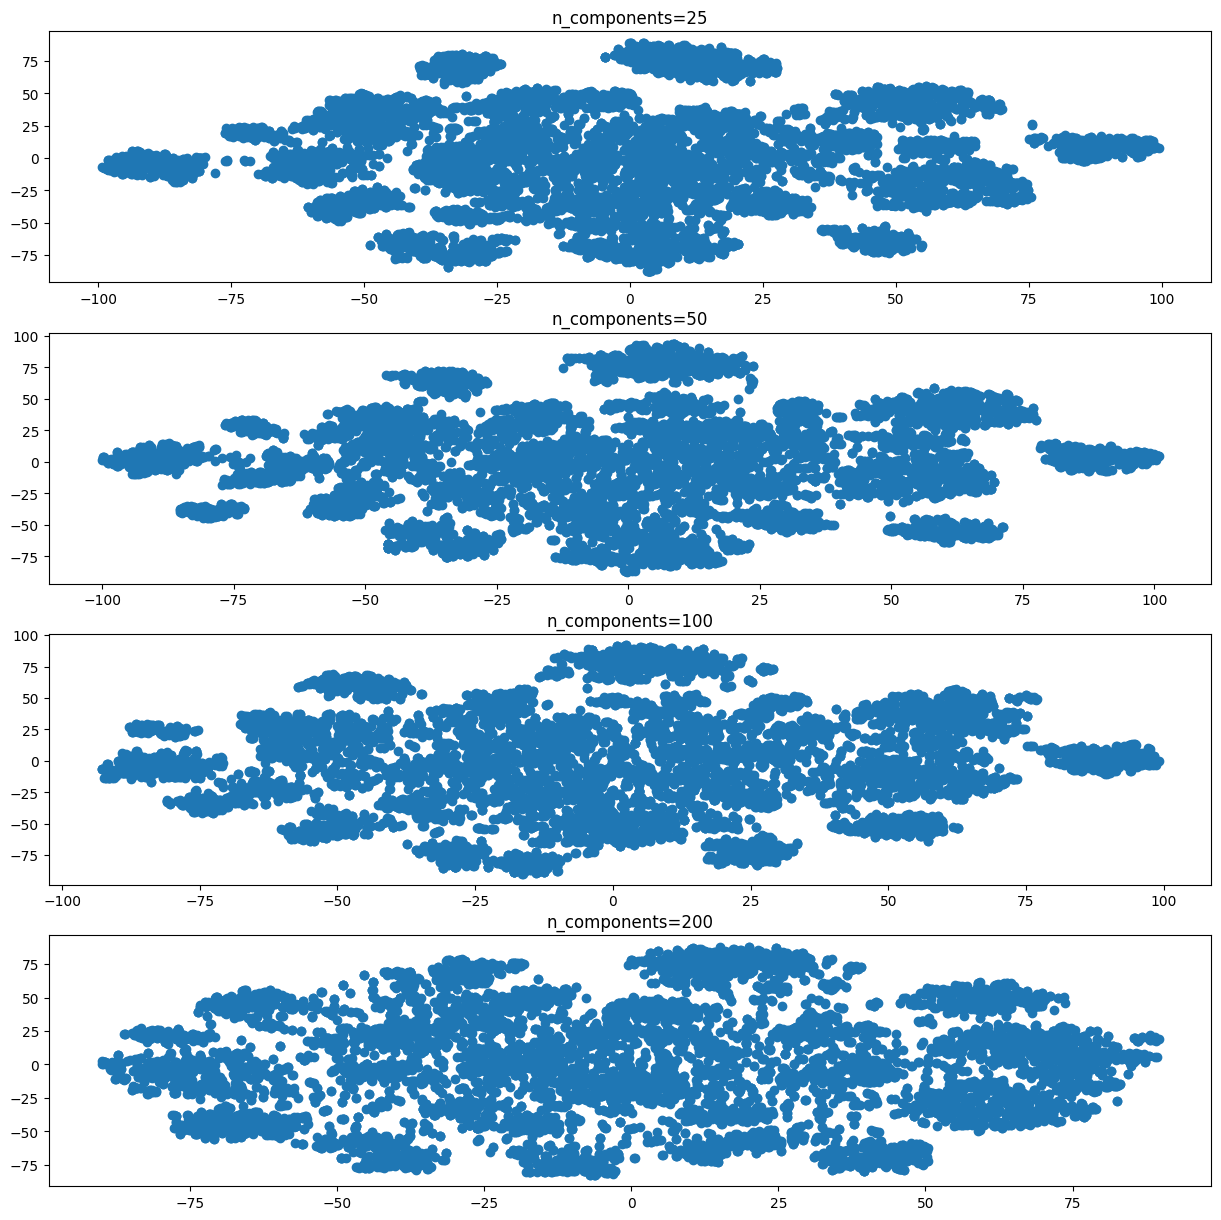

In [46]:
num_components = [25, 50, 100, 200]

_, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))
for i, n in enumerate(num_components):
  pca = PCA(n_components=n).fit_transform(embeddings)

  tsne_results = TSNE(n_components=2).fit_transform(pca)
  
  print(pca.shape)

  ax[i].set_title(f'n_components={n}')
  ax[i].scatter(tsne_results[:,0], tsne_results[:,1])



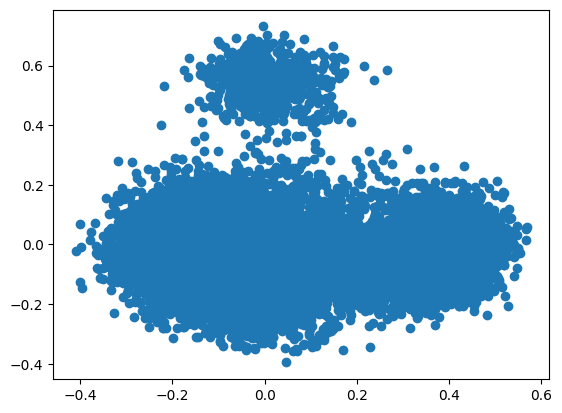

In [47]:
pca = PCA(n_components=2).fit_transform(embeddings)

plt.scatter(pca[:,0], pca[:,1])